In [2]:
import pandas as pd
import numpy as np
from pulp import LpMaximize,LpMinimize, LpProblem, LpStatus, lpSum, LpVariable

In [55]:
def solve(A):
    max_min = np.max(np.min(A, axis=1))
    min_max = np.min(np.max(A, axis=0))
    
    if max_min==min_max:
        i_best = np.argmax(np.min(A, axis=1))
        j_best = np.argmin(np.max(A, axis=0))
        return i_best, j_best, min_max
    
    # a must be > 0
    alpha = np.min(A)
    if alpha <= 0:
        A += -alpha + 1
        
    # LP1
    u_dict = LpVariable.dicts("u", range(A.shape[0]), lowBound=0)
    model = LpProblem(name="First", sense=LpMinimize)
    obj = lpSum(u_dict)
    
    model += obj
    
    # constraints
    for j in range(A.shape[1]):
        cur_const = [A[i, j] * u_dict[i] for i in range(A.shape[0])]
        model += lpSum(cur_const) >= 1
    
    status = model.solve()
    print(f'First:')
    print(f'status = {LpStatus[status]}')
    print(f'Objective = {model.objective.value()}', end='\n\n')
    
    u_vars = np.array([])
    for var in model.variables():
        u_vars = np.append(u_vars, var.value())
        print(f'{var.name}: {var.value()}')
    print('\n')
    
    # LP2
    v_dict = LpVariable.dicts("v", range(A.shape[1]), lowBound=0)
    model = LpProblem(name="Second", sense=LpMaximize)
    obj = lpSum(v_dict)
    
    model += obj
    
    # constraints
    for i in range(A.shape[0]):
        cur_const = [A[i, j] * v_dict[j] for j in range(A.shape[1])]
        model += lpSum(cur_const) <= 1
    
    status = model.solve()
    print(f'Second:')
    print(f'status = {LpStatus[status]}')
    print(f'Objective = {model.objective.value()}', end='\n\n')
    opt_solve = model.objective.value()
    
    v_vars = np.array([])
    for var in model.variables():
        v_vars = np.append(v_vars, var.value())
        print(f'{var.name}: {var.value()}')
    
    I = 1 / opt_solve
    u_vars *= I
    v_vars *= I
    
    return u_vars, v_vars, I

In [56]:
A = np.array([[4, 3, 4, 2],
             [3, 4, 6, 5],
             [2, 5, 1, 3]])

solve(A)

First:
status = Optimal
Objective = 0.28571428

u_0: 0.14285714
u_1: 0.14285714
u_2: 0.0


Second:
status = Optimal
Objective = 0.28571428099999996

v_0: 0.21428571
v_1: 0.0
v_2: 0.0
v_3: 0.071428571


(array([0.5, 0.5, 0. ]), array([0.75, 0.  , 0.  , 0.25]), 3.5000000577500017)

# Пример

Предприниматель располагает тремя видами товаров: А1, А2, А3, которые он стремится реализовать на рынке, где возможна продажа конкурентом аналогичных товаров:  В1, В2, В3, соответственно. Предпринимателю не известно, какой вид товаров  преимущественно конкурент будет продавать на рынке, а конкуренту не известно, какие товары предпринимателя на этом рынке появятся. Предприниматель располагает данными о том, какова  вероятность продать тот или иной товар при наличии на рынке товаров конкурента. Эти данные образуют матрицу игры (таблица 1). Необходимо дать предпринимателю рекомендации по  рациональному выбору вида товаров для продвижения их на рынок в условиях конкуренции, при котором обеспечивается получение наилучшего возможного результата - наибольшей вероятности продаж, что бы ни предпринимал конкурент.

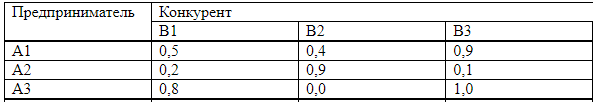 

In [57]:
A = np.array([[0.5, 0.4, 0.9],
             [0.2, 0.9, 0.1],
             [0.8, 0, 1]])

solve(A)

First:
status = Optimal
Objective = 0.67567568

u_0: 0.0
u_1: 0.36036036
u_2: 0.31531532


Second:
status = Optimal
Objective = 0.67567568

v_0: 0.40540541
v_1: 0.27027027
v_2: 0.0


(array([0.        , 0.53333333, 0.46666667]),
 array([0.6, 0.4, 0. ]),
 1.4799999905280001)

Решение заключается в том, что необходимо  систематически применять максиминную стратегию - товар типа А1. При этом предпринимателю гарантируется результат не менее p = 0,4, что бы ни предпринимал конкурент (его замыслы нам не известны). Для конкурента наилучшая стратегия - выбор товара вида В1; при этом он гарантирует себе результат не более p = 0,8 (чем прибыль предпринимателя больше, тем для него хуже).